In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
haberman_data = files.upload()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
haber=pd.read_csv("haberman.csv") #load files into pandas dataframe
print (haber.shape)#(datapoints,features)
haber.info() #check to see if data points missing
print(haber.columns) #features of data point
print(haber["status"].value_counts() )#counts of classes 1 and 2 shows the data is imbalanced

(306, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
Index(['age', 'year', 'nodes', 'status'], dtype='object')
1    225
2     81
Name: status, dtype: int64


* We can see it is an imbalanced dataset 

In [0]:
haber.describe() 

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [0]:
long_survive= haber.loc[haber["status"] == 1]; #class 1
short_survive= haber.loc[haber["status"] == 2]; #class 2
print(long_survive.describe())
print(short_survive.describe())


              age        year       nodes  status
count  225.000000  225.000000  225.000000   225.0
mean    52.017778   62.862222    2.791111     1.0
std     11.012154    3.222915    5.870318     0.0
min     30.000000   58.000000    0.000000     1.0
25%     43.000000   60.000000    0.000000     1.0
50%     52.000000   63.000000    0.000000     1.0
75%     60.000000   66.000000    3.000000     1.0
max     77.000000   69.000000   46.000000     1.0
             age       year      nodes  status
count  81.000000  81.000000  81.000000    81.0
mean   53.679012  62.827160   7.456790     2.0
std    10.167137   3.342118   9.185654     0.0
min    34.000000  58.000000   0.000000     2.0
25%    46.000000  59.000000   1.000000     2.0
50%    53.000000  63.000000   4.000000     2.0
75%    61.000000  65.000000  11.000000     2.0
max    83.000000  69.000000  52.000000     2.0


1. mean = 2.7 for long_survive shows that people who live long had less nodes
2. node is a very good feature for distinction of classes

3. with percentiles we can analyze the distribution of age group and year
4. the max value shows the outlier present in nodes column in class 1 and 2
5. mean for class 2 =7.4 which is more than double than that of class1 sayings more nodes patients will likely survive short

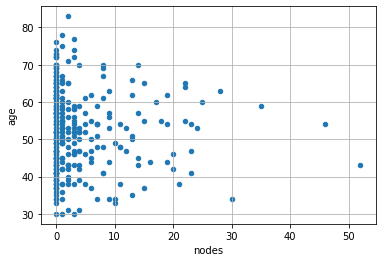

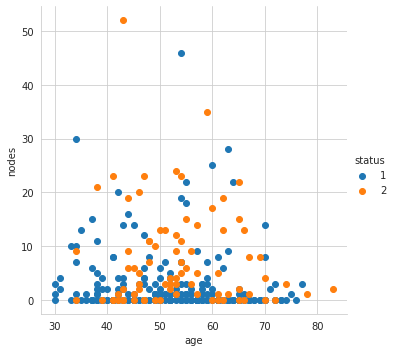

In [0]:
haber.plot(kind="scatter" , x="nodes",y="age") ;
plt.grid()
plt.show()
#scatterplot doesnt  get more info about diff class
sns.set_style("whitegrid");
sns.FacetGrid(haber, hue="status",height=5) \
    .map(plt.scatter,"age","nodes") \
    .add_legend();
plt.show(); #somewhat better than scatter plot visualization

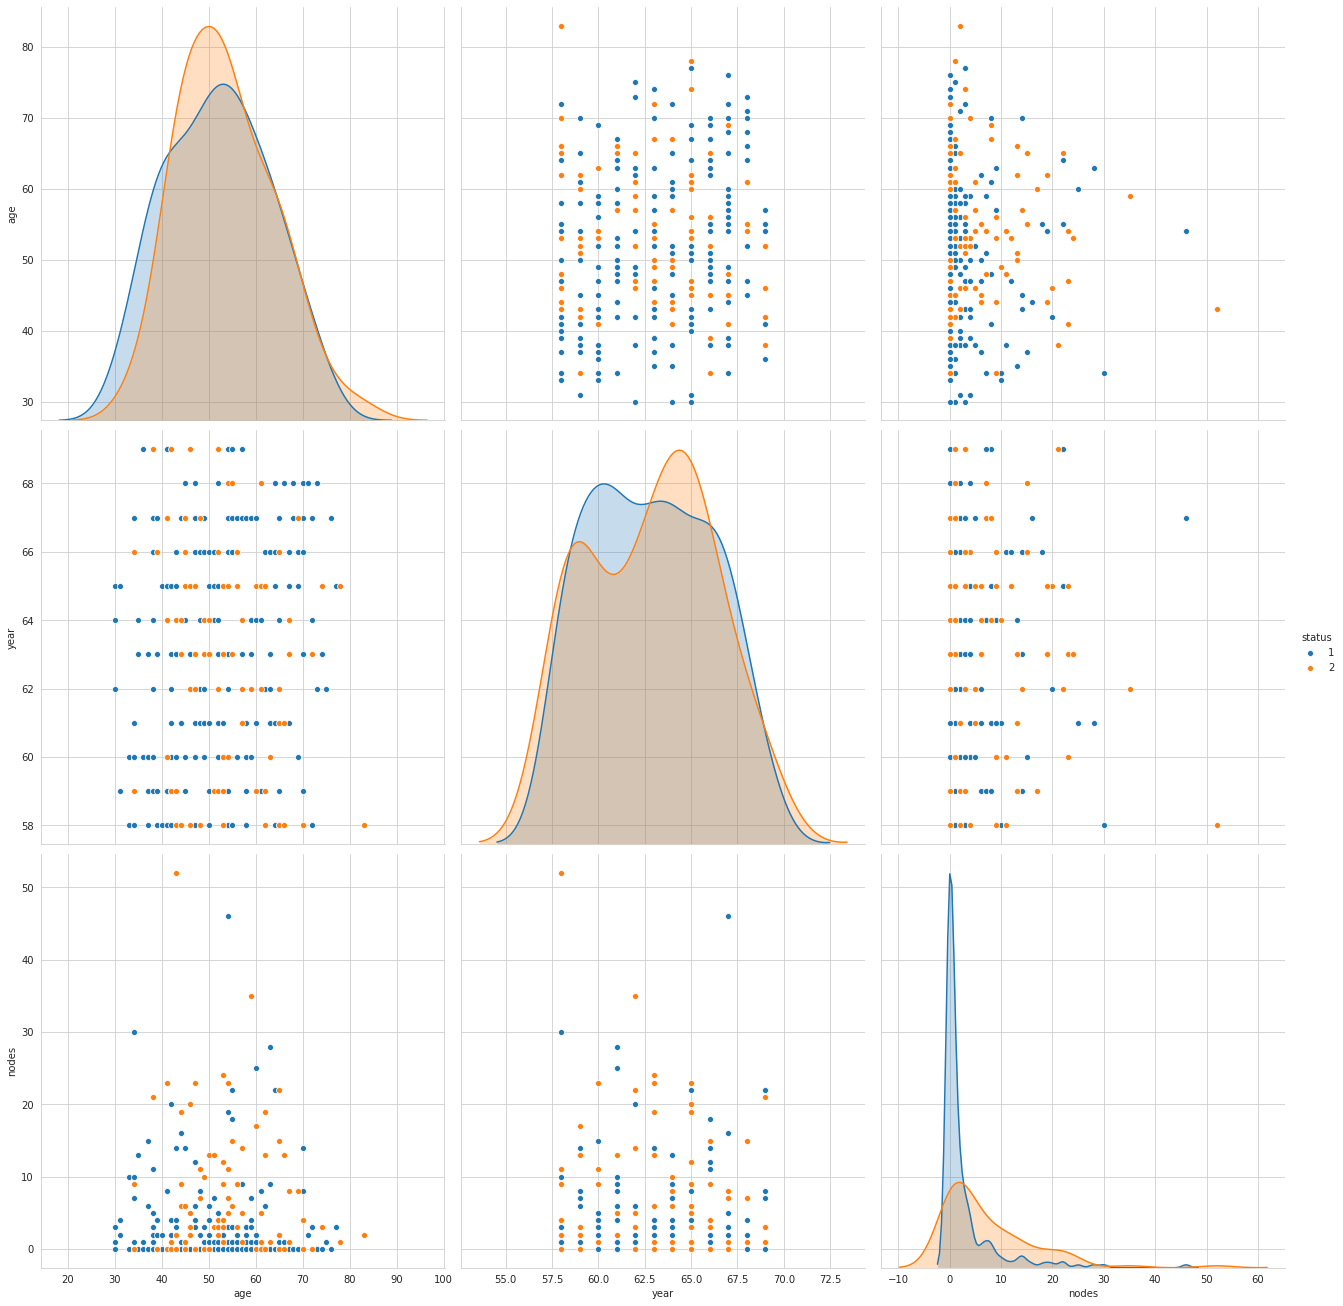

In [0]:
#pair plot to find best features
sns.set_style("whitegrid");
sns.pairplot(haber,hue="status",height=6,vars=
             ["age","year", "nodes"])
plt.show()


#        OBSERVATIONS
1. overlapping datapoints least in plot 3 and 7
2. plot 3 is better than all other plots 
3. features most useful are age and nodes
4. in plot 7 we can see many  orange and blue data points are on nodes=0 which implies patients with zero nodes have survived long and short both.

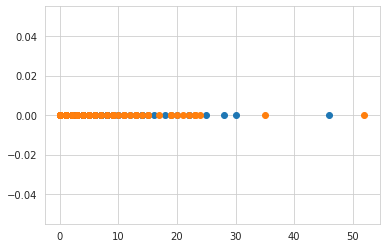

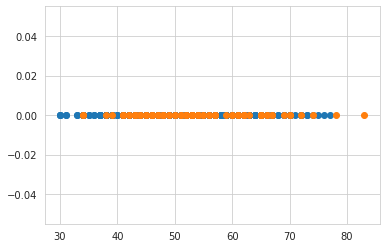

In [0]:
#visualize using 1d scatter plot
plt.plot(long_survive["nodes"], np.zeros_like(long_survive['nodes']),'o')
plt.plot(short_survive["nodes"], np.zeros_like(short_survive["nodes"]),'o')
plt.show()
plt.plot(long_survive["age"], np.zeros_like(long_survive['age']),'o')
plt.plot(short_survive["age"], np.zeros_like(short_survive["age"]) ,'o')

1. overlapping data points so cant distinguish
2. more better visualization with pdf and cdf



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


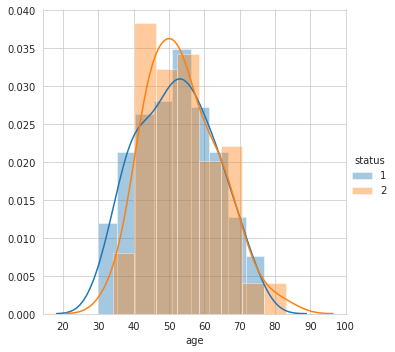

In [0]:
sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();


important observation:
1. age between 34 to 77 have both short_survival and long_survival .so cant differntiate
2. age is a great feature which can be used 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


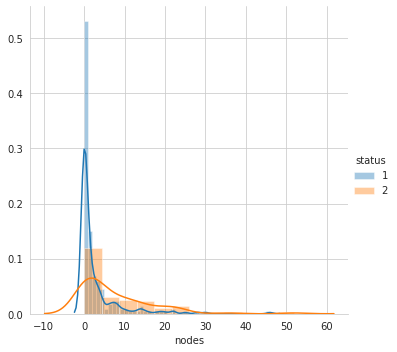

In [0]:
sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();


useful pdf
 this graph says 
```
# if(nodes>=0 and nodes<=3(approx)):
      patient=long_survive
  else if(nodex>3 ):
      patient=short_survive
    
```
1. patient survives long if he has less nodes


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


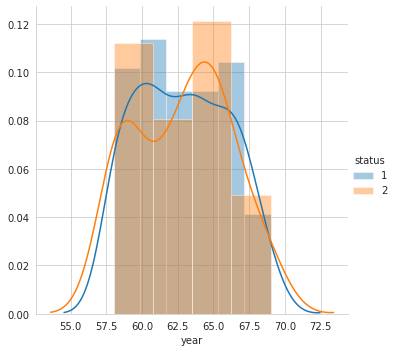

In [0]:
sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

1. not very useful feature in distinguishing class status


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


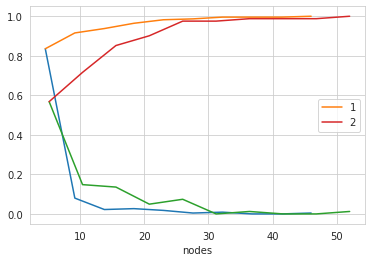

In [0]:
#plot cdf
#can visualize how are people are short_survive and long_survive
counts, bin_edges=np.histogram(long_survive["nodes"], bins=10,
                                density=True)
pdf=counts/sum(counts)
print(pdf);
print(bin_edges);
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf,label="1")

counts, bin_edges = np.histogram(short_survive['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf,label = "2")
plt.xlabel("nodes")
plt.legend()
plt.show();


**observation:**
1. approx 85% who survived long had nodes less than 4
2. approx 96% people who survived short has nodes less than 26
3. around 56% who survived short had nodes less than 4
4. 100% people short survived if nodes >36



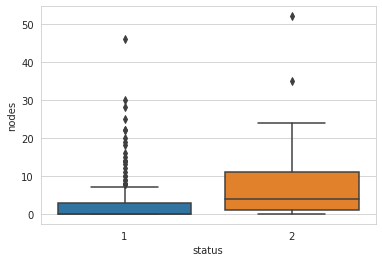

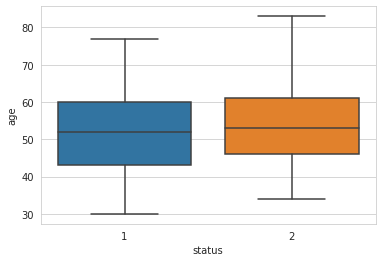

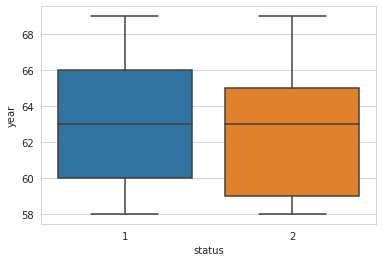

In [0]:
sns.boxplot(x="status",y="nodes", data=haber)
plt.show()
sns.boxplot(x='status',y='age',data=haber)
plt.show()
sns.boxplot(x='status',y='year',data=haber)
plt.show()
#visualize more using box plot

1. plot 1 blue box nodes has a lot of outliers as black dots
2. nodes for long_survive in 25 th and 75th percentile  lie between[0,6.5]
3. In plot 2  patients in age [46,62] did not survive  which shows age is not a big factor in determining patient survival.

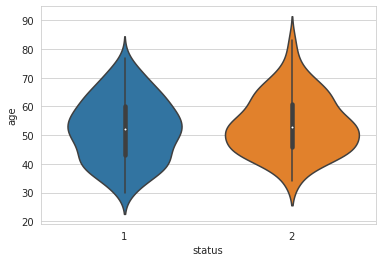

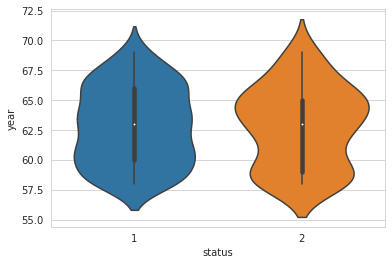

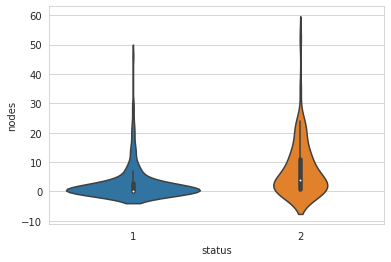

In [0]:
sns.violinplot(x="status",y="age" ,data = haber,height = 10)
plt.show()
sns.violinplot(x="status",y="year",data = haber,height = 10)
plt.show()
sns.violinplot(x="status",y="nodes",data = haber,height = 10)
plt.show()

**Observations**
1. IN age and year features box plot and voilin plot overlap each other
2. the 50th percentile of voilin plot 1 and 2 are close to each other.
3. IN box plots and violin plots for age and year parameters give similar results with a substantial overlap of data points. The overlap in the box plot and the violin plot of nodes is less compared to other features but the overlap still exists which makes it more useful compared to age and year.
4. in voilin plot 3 blue voilin plot has more density close to zero nodes so survival is more if nodes are less . in orange plot it shows low survival density from 0 to 25 

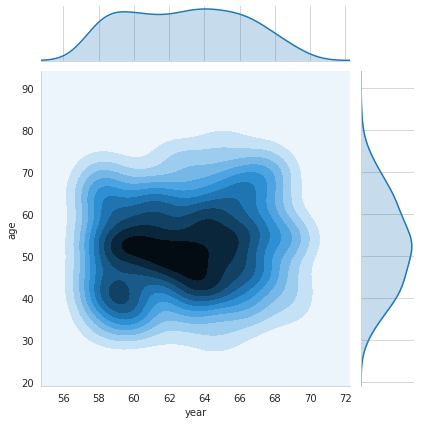

In [0]:
#multivariate analysis
sns.jointplot(x = 'year',y='age' ,data = haber, kind = 'kde')
plt.show()

1. It is a three dimensional cross sectional view of data points .
2. most patients who have been treated are in the age group from 45 to 55 yrs of age.
3. most people treated in year 60-64 as very high density of points

**Conclusions: **
1. patients with 0 or less number of nodes are more likely to survive long.
2. age isn't a big factor in survival of patients.
3. As the dataset is fairly small and less number of deciding features it is hard to distinguish between class "1" and "2".
